In [7]:
import NaCsData
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Example 1: Get Survivals per site, and avg survivals per parameter with no modifications
data = NaCsData.NaCsData('20231030', '125545', 'N:\\NaCsLab\\Data\\')

load_img = np.array([2])
surv_img = np.array([4])

survs, surv_errs, unique_params = data.get_survival_prob_by_site(load_img, surv_img)

# The returned survs is nparams x nsites
nsites = survs.shape[1]
nparams = survs.shape[0]

# TODO: No support yet for ScanGroup in Python
X = unique_params

# Plot sites 1 to 5
plt.figure()
for site in range(5):
    plt.errorbar(X, survs[:,site + 1], surv_errs[:, site + 1])

Loading N:\NaCsLab\Data\20231030\data_20231030_125545\data_20231030_125545.mat


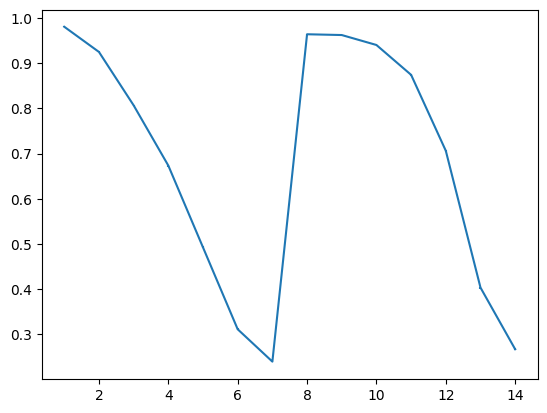

In [ ]:
# Now we get the average
surv_avg, surv_avg_err, unique_params = data.get_survival_prob_avg(load_img, surv_img)
plt.figure()
plt.errorbar(X, surv_avg, surv_avg_err)
plt.show()

In [ ]:
# Example 2: Time bin
chr(47)

'/'

In [ ]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_load_and_surv_logs',
 'datasets',
 'get_expectation_val',
 'get_load_idxs',
 'get_logicals',
 'get_survival_prob_avg',
 'get_survival_prob_by_site',
 'n_datasets',
 'param_map']

In [ ]:
data.datasets[0].data.keys()

<KeysViewHDF5 ['#refs#', 'Analysis', 'Scan']>

In [ ]:
data.datasets[0].data["Scan/ScanGroup"].keys()

<KeysViewHDF5 ['base', 'runparam', 'scans', 'use_var_base', 'use_var_scans', 'version']>

In [ ]:
data.datasets[0].data["Scan/ScanGroup/base/params"].keys()

<KeysViewHDF5 ['CsBlastSLMF3Amp', 'CsBlastSLMF4Amp', 'DoCoolNa', 'DoDetection', 'DoOP', 'PTweezerSLMCsBlast', 'ParamUnits', 'PlotScale', 'bCsBlastSLM', 'bTrapMerge', 'tCsRampSLMTrap', 'tCsRampSLMWait']>

In [ ]:
data.datasets[0].data["Scan/ScanGroup/base/params"].keys()

<KeysViewHDF5 ['CsBlastSLMF3Amp', 'CsBlastSLMF4Amp', 'DoCoolNa', 'DoDetection', 'DoOP', 'PTweezerSLMCsBlast', 'ParamUnits', 'PlotScale', 'bCsBlastSLM', 'bTrapMerge', 'tCsRampSLMTrap', 'tCsRampSLMWait']>

In [ ]:
import utils
import h5py
import SingleData
import numpy as np

In [ ]:
fixed_params = utils.cvt_to_dict(data.datasets[0].data, "Scan/ScanGroup/base/params")

In [ ]:
data.datasets[0].data["Scan/ScanGroup/scans/params"]

<HDF5 dataset "params": shape (2,), type "<u8">

In [ ]:
fixed_params['CsBlastSLMF3Amp']

array([[0.]])

In [ ]:
fixed_params

{'CsBlastSLMF3Amp': array([[0.]]),
 'CsBlastSLMF4Amp': array([[0.]]),
 'DoCoolNa': array([[0.]]),
 'DoDetection': array([[1.]]),
 'DoOP': array([[0.]]),
 'PTweezerSLMCsBlast': array([[0.]]),
 'ParamUnits': array([0, 0], dtype=uint64),
 'PlotScale': array([[1.]]),
 'bCsBlastSLM': array([[1.]]),
 'bTrapMerge': array([[0.]]),
 'tCsRampSLMTrap': array([[0.]]),
 'tCsRampSLMWait': array([[0.]])}

In [ ]:
utils.cvt_to_dict(data.datasets[0].data,"")

NameError: name 'data' is not defined

In [ ]:
data.datasets[0].data["Scan/ScanGroup/base/vars/params"]

<HDF5 dataset "params": shape (2, 1), type "|O">

In [ ]:
data.datasets[0].data["Scan/ScanGroup/base/vars/params"][0][0]

<HDF5 object reference>

In [ ]:
name1 = h5py.h5r.get_name(data.datasets[0].data["Scan/ScanGroup/base/vars/params"][0][0], data.datasets[0].data.id).decode()
name1

'/#refs#/t'

In [ ]:
utils.cvt_multidim_array(data.datasets[0].data, name1 + '/TCsBlastSLM')

array([[0.e+00, 1.e-05, 2.e-05, 3.e-05, 5.e-05, 1.e-04, 2.e-04]])

In [ ]:
data.datasets[0].data.id

In [ ]:
data.datasets[0].data[name1]['TCsBlastSLM']

<HDF5 dataset "TCsBlastSLM": shape (7, 1), type "<f8">

In [ ]:
name2 = h5py.h5r.get_name(data.datasets[0].data["Scan/ScanGroup/base/vars/params"][1][0], data.datasets[0].data.id).decode()

In [ ]:
utils.cvt_multidim_array(data.datasets[0].data, name2 + '/DoCoolCs')

array([[0., 1.]])

In [ ]:
data2 = SingleData.SingleData('20250212', '101956', 'W:\\NaCsRydLab\\Data\\')

Loading W:\NaCsRydLab\Data\20250206\data_20250206_184216\data_20250206_184216.mat


Exception ignored in: <function SingleData.__del__ at 0x0000016DF21AFE20>
Traceback (most recent call last):
  File "c:\Users\goyan\projects\NaCsDataPy\NaCsDataPy\SingleData.py", line 86, in __del__
    self.data.close()
AttributeError: 'dict' object has no attribute 'close'


In [ ]:
results = data2.data['Scan']['ScanGroup']

In [ ]:
results

{'base': {'params': {'DoCoolCs': array(0.),
   'DoCoolNa': array(0.),
   'DoOP': array(0.),
   'Re2DAlg': {'PGrabSLMCs': array(300.), 'PGrabSLMNa': array(20.)},
   'bTrapMerge': array(0.),
   'bUV': array(0.),
   'scanfilename': array([ 77,  79,  84,  83,  99,  97, 110, 115], dtype=uint16),
   'scanname': array([77, 79, 84, 68, 49], dtype=uint16)},
  'vars': array([0, 0], dtype=uint64)},
 'runparam': {'AnalysisScript': array([ 97, 110,  97, 108, 121, 122, 101,  95, 108, 111,  97, 100, 105,
         110, 103,  95, 114,  97, 116, 101,  50], dtype=uint16),
  'AndorCenter': array([368., 330.]),
  'BoxSize': array(4.),
  'Cutoffs': [array([29470. , 29055. , 28794. , 30120.5, 29698. , 30065.5, 30354. ,
          30399.5, 30976. , 30543. , 30152.5, 30243. , 31219. , 30831.5,
          30858.5, 31082. , 31579. , 31326. , 30871.5, 30454.5]),
   array([12660. , 11927.6, 13096. , 11995.5, 12507. , 12828. , 12260. ,
          11888.5, 12471. , 12510. , 12589. , 13397.5, 12247.5, 12118. ,
         

In [ ]:
results[2]

array([2, 3])

In [ ]:
np.where(np.in1d(np.array([2,3]), data2.seq_idxs))[0]

C:\Users\goyan\AppData\Local\Temp\ipykernel_36276\2479200757.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.where(np.in1d(np.array([2,3]), data2.seq_idxs))[0]


array([0, 1])

In [ ]:
data2.data['Scan']['ScanGroup']

{'base': {'params': {'CsBlastSLMF4Amp': array(0.17),
   'DoCoolCs': array(0.),
   'DoCoolNa': array(0.),
   'DoDetection': array(1.),
   'DoDetectionNa': array(1.),
   'DoOP': array(1.),
   'Na': {'Detect': {'Blast': {'F2Amp': array(0.3), 'T': array(1.e-06)}}},
   'PTweezerSLMCsBlast': array(600.),
   'bCsBlast1': array(0.),
   'bCsBlastSLM': array(1.),
   'bTrapMerge': array(0.),
   'scanfilename': array([ 78,  97,  67, 115,  83,  99,  97, 110, 115], dtype=uint16),
   'scanname': array([ 66, 108,  97, 115, 116,  68, 101, 116,  83,  76,  77],
         dtype=uint16)},
  'vars': {'params': {'DetCsBlastSLM': array([13000000., 13900000., 14800000., 15700000., 16600000., 17500000.,
           18400000., 19300000., 20200000., 21100000., 22000000.])},
   'size': array(11.)}},
 'runparam': {'AnalysisScript': array([ 97, 110,  97, 108, 121, 122, 101,  95, 116, 114,  97, 112,  95,
         100, 101, 112, 116, 104,  95, 112, 101, 114,  95, 115, 105, 116,
         101], dtype=uint16),
  'AndorCent

In [ ]:
datadict['Scan']['version']

array(4.)

In [ ]:
dict2 = utils.cvt_to_dict(data2.data)

In [ ]:
dict2['Scan']['NumImages'] + 1

np.float64(9.0)

In [ ]:
import numpy as np
with np.nditer(temp, flags=['refs_ok'], op_flags=['readwrite']) as it:
    for this_item in it:
        if isinstance(this_item.item(), h5py.h5r.Reference):
            this_item[...] = file[h5py.h5r.get_name(this_item.item(), file.id)][()]

NameError: name 'temp' is not defined

In [ ]:
isinstance(dict2['Cutoffs'][0],h5py.h5r.Reference)

True

In [ ]:
import numpy as np
a = np.array([[1,2,3], [2,3,4]])

In [ ]:
for idx, item in enumerate(np.nditer(a)):
    print((idx, item))

(0, array(1))
(1, array(2))
(2, array(3))
(3, array(2))
(4, array(3))
(5, array(4))


In [ ]:
with np.nditer(a, op_flags=['readwrite']) as it:
    for item in it:
        item[...] *= 2  # Modify element in-place

In [ ]:
a

array([[2, 4, 6],
       [4, 6, 8]])

In [ ]:
dict2 = utils.cvt_to_dict(data2.data, "Scan")

In [ ]:
data2.data['Scan/ScanGroup'].keys()

<KeysViewHDF5 ['base', 'runparam', 'scans', 'use_var_base', 'use_var_scans', 'version']>

In [ ]:
dict3 = 

{'AndorCenter': array([368., 330.]),
 'BoxSize': array(4.),
 'CsSLMConfig': array([0, 0], dtype=uint64),
 'Cutoffs': [array([29470. , 29055. , 28794. , 30120.5, 29698. , 30065.5, 30354. ,
         30399.5, 30976. , 30543. , 30152.5, 30243. , 31219. , 30831.5,
         30858.5, 31082. , 31579. , 31326. , 30871.5, 30454.5]),
  array([12660. , 11927.6, 13096. , 11995.5, 12507. , 12828. , 12260. ,
         11888.5, 12471. , 12510. , 12589. , 13397.5, 12247.5, 12118. ,
         12421.5, 12087. , 12340. , 12705. , 13192.5, 12860. ]),
  array([29470. , 29055. , 28794. , 30120.5, 29698. , 30065.5, 30354. ,
         30399.5, 30976. , 30543. , 30152.5, 30243. , 31219. , 30831.5,
         30858.5, 31082. , 31579. , 31326. , 30871.5, 30454.5]),
  array([12660. , 11927.6, 13096. , 11995.5, 12507. , 12828. , 12260. ,
         11888.5, 12471. , 12510. , 12589. , 13397.5, 12247.5, 12118. ,
         12421.5, 12087. , 12340. , 12705. , 13192.5, 12860. ]),
  array([-3., -3., -3., -3., -3., -3., -3., -3.,

In [ ]:
type(data2.data['/#refs#/1/Re2DAlg/HorzSelectors'])

h5py._hl.dataset.Dataset

In [ ]:
type(data2.data['/#refs#/1/Re2DAlg'])

h5py._hl.group.Group

In [ ]:
type(data2.data['Scan'])

h5py._hl.group.Group

In [ ]:
data2.data.keys()

<KeysViewHDF5 ['#refs#', 'Analysis', 'Scan']>

In [ ]:
dict2['Analysis']['SummaryData']['av_images'].shape

(90, 160, 8)

In [ ]:
dict2['Scan']['FrameSize'][0]

np.float64(90.0)

In [ ]:
dict2['Scan']['ImgsToSave'].size

6

In [ ]:
test = h5py.File('W:\\NaCsRydLab\\Data\\20250206\\data_20250206_162814\\data_20250206_162814_imgs.mat')

In [ ]:
test2 = utils.cvt_multidim_array(test, 'Images')

In [ ]:
test2.shape

(90, 160, 1686)

In [ ]:
test_imgs = np.zeros([30,40, 20])
for i in range(20):
    test_imgs[:,:,i] = i * np.ones([30,40])

In [ ]:
test_imgs.shape

(30, 40, 20)

In [ ]:
test_imgs[:,:,0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(30, 40))

In [ ]:
test_imgs[:,:,2]

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]], shape=(30, 40))

In [ ]:
test2 = np.transpose(np.reshape(test_imgs, [30, 40, 5, 4]), (0,1,3,2))

In [ ]:
test2[:,:,2,0]

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]], shape=(30, 40))

In [1]:
import SingleData
import numpy as np

data3 = SingleData.SingleData('20250212', '101956', 'W:\\NaCsRydLab\\Data\\')

Loading W:\NaCsRydLab\Data\20250212\data_20250212_101956\data_20250212_101956.mat


In [6]:
results = data3.get_logicals(seq_idxs=np.array([1,2,3]), img_idxs=np.array([2,4,3]))
data3.seq_idxs

array([1, 2, 3])

In [9]:
results[0].shape

(3, 40, 3)

In [6]:
np.where(np.in1d(np.array([1,2,3,0]), np.array([0,1,3])))

C:\Users\goyan\AppData\Local\Temp\ipykernel_28352\3635281209.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.where(np.in1d(np.array([1,2,3,0]), np.array([0,1,3])))


(array([0, 2, 3]),)

In [9]:
a = np.random.rand(5,3,5)

In [10]:
a[[0,1], 1, [0,2,3]]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

In [12]:
np.where(np.in1d(np.array([0,1,2]), np.array([1,2,3])))[0]

C:\Users\goyan\AppData\Local\Temp\ipykernel_9476\4178106197.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.where(np.in1d(np.array([0,1,2]), np.array([1,2,3])))[0]


array([1, 2])